$f(x,y) = \sin{x} \cos{y}$

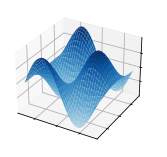

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
import math

from matplotlib import cm

plt.style.use('_mpl-gallery')

# Make data
X = np.arange(-np.pi, np.pi, 0.1)
Y = np.arange(-np.pi, np.pi, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X)*np.cos(Y)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

In [19]:
NT = np.product(X.shape)

data = {
    "x": np.reshape(X,NT),
    "y": np.reshape(Y,NT),
    "z": np.reshape(Z,NT)
}
df = pd.DataFrame(data=data)

df

,x,y,z
0,-3.141593,-3.141593,1.224647e-16
1,-3.041593,-3.141593,9.983342e-02
2,-2.941593,-3.141593,1.986693e-01
3,-2.841593,-3.141593,2.955202e-01
4,-2.741593,-3.141593,3.894183e-01
...,...,...,...
3964,2.658407,3.058407,-4.629956e-01
3965,2.758407,3.058407,-3.725838e-01
3966,2.858407,3.058407,-2.784493e-01
3967,2.958407,3.058407,-1.815326e-01


In [22]:
X = df[['x','y']]
Y = df['z']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2778 1191


In [23]:
#{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100, 50, 30), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
regr = MLPRegressor(
    #activation="tanh",
    #alpha=0.05,
    hidden_layer_sizes=(100, 50)
    #learning_rate="constant",
    #max_iter=100,
    #solver="adam"
).fit(X_train, Y_train)
regr.predict(X_test)
regr.score(X_test, Y_test)

0.9922379296623342

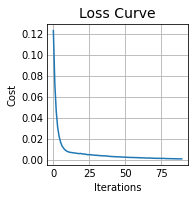

In [24]:
plt.plot(regr.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [38]:
def eval(x,y):
    return regr.predict([[x, y]])

In [37]:
regr.predict([[-0.7, 0.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


array([-0.62018527])

In [36]:
math.sin(-0.7)*math.cos(0.3)

-0.6154446635582734

In [48]:
eval(-np.pi,-np.pi)

array([0.39592595])

In [41]:
veval = np.vectorize(eval)

In [43]:
import warnings
warnings.filterwarnings("ignore")
Z_predict = veval(X,Y)

In [45]:
Z_predict

array([[ 0.39592595,  0.4419463 ,  0.49542692, ..., -0.58179207,
        -0.53311337, -0.4903593 ],
       [ 0.34929016,  0.38651962,  0.43669645, ..., -0.52018845,
        -0.47671343, -0.4421233 ],
       [ 0.30402604,  0.33947016,  0.37889493, ..., -0.46372356,
        -0.42675429, -0.40229341],
       ...,
       [ 0.09472581,  0.15217741,  0.21801512, ..., -0.31767594,
        -0.25393672, -0.19898192],
       [ 0.11199845,  0.17756171,  0.25000198, ..., -0.35558175,
        -0.28764714, -0.22499693],
       [ 0.13716446,  0.20966503,  0.2839682 , ..., -0.40055078,
        -0.32570153, -0.25761834]])

In [46]:
Z

array([[ 1.22464680e-16,  9.98334166e-02,  1.98669331e-01, ...,
        -2.79415498e-01, -1.82162504e-01, -8.30894028e-02],
       [ 1.21852867e-16,  9.93346654e-02,  1.97676812e-01, ...,
        -2.78019585e-01, -1.81252451e-01, -8.26743019e-02],
       [ 1.20023540e-16,  9.78433950e-02,  1.94709171e-01, ...,
        -2.73845791e-01, -1.78531382e-01, -8.14331467e-02],
       ...,
       [ 1.17586947e-16,  9.58570803e-02,  1.90756388e-01, ...,
        -2.68286459e-01, -1.74907024e-01, -7.97799757e-02],
       [ 1.20415655e-16,  9.81630477e-02,  1.95345283e-01, ...,
        -2.74740441e-01, -1.79114641e-01, -8.16991874e-02],
       [ 1.22041209e-16,  9.94882024e-02,  1.97982352e-01, ...,
        -2.78449307e-01, -1.81532604e-01, -8.28020877e-02]])

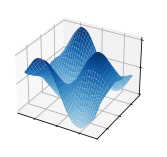

In [44]:
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z_predict, vmin=Z_predict.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()